<a href="https://colab.research.google.com/github/jamesfloe/cap-comp215/blob/main/Labs_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [2]:
%matplotlib inline

from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import animation
from scipy.signal import convolve2d

In [3]:
class Cell2DViewer():
    """Generates an animated view of an array image."""

    cmap = plt.get_cmap('Greens')
    options = dict(interpolation='nearest', alpha=0.8,
                   vmin=0, vmax=1, origin='upper')

    def __init__(self):
        self.im = None
        self.hlines = None
        self.vlines = None

     #TODO: should this really take iters?
    def step(self, iters=1):
        """Advances the viewee the given number of steps."""
        for i in range(iters):
            self.step()

    def draw(self, grid=False):
        """Draws the array and any other elements.
        grid: boolean, whether to draw grid lines
        """
        self.draw_array(self.array)
        if grid:
            self.draw_grid()

    def draw_array(self, array=None, cmap=None, **kwds):
        """Draws the cells."""
        # Note: we have to make a copy because some implementations
        # of step perform updates in place.
        if array is None:
            array = self.array
        a = array.copy()
        cmap = self.cmap if cmap is None else cmap

        n, m = a.shape
        plt.axis([0, m, 0, n])
        plt.xticks([])
        plt.yticks([])

        options = self.options.copy()
        options['extent'] = [0, m, 0, n]
        options.update(kwds)
        self.im = plt.imshow(a, cmap, **options)

    def draw_grid(self):
        """Draws the grid."""
        a = self.array
        n, m = a.shape
        lw = 2 if m < 7 else 1
        options = dict(color='white', linewidth=lw)

        # the shift is a hack to get the grid to line up with the cells
        shift = 0.005 * n
        rows = np.arange(n) + shift
        self.hlines = plt.hlines(rows, 0, m, **options)

        cols = np.arange(m)
        self.vlines = plt.vlines(cols, 0, n, **options)

    def animate(self, frames=20, interval=200, grid=False):
        """Creates an animation.
        frames: number of frames to draw
        interval: time between frames in ms
        """
        fig = plt.gcf()
        self.draw(grid)
        anim = animation.FuncAnimation(fig, self.animate_func,
                                       init_func=self.init_func,
                                       frames=frames, interval=interval)
        return anim

    def init_func(self):
        """Called at the beginning of an animation."""
        pass

    def animate_func(self, i):
        """Draws one frame of the animation."""
        if i > 0:
            self.step()
        a = self.array
        self.im.set_array(a)
        return (self.im,)

In [4]:
class Cell2D(Cell2DViewer):
    """Implements Conway's Game of Life."""

    def __init__(self, n, m=None):
        """Initializes the attributes.
        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.
        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def step(self):
        """Executes one time step."""
        pass

## Game of Life entities



In [5]:
from scipy.signal import correlate2d

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [6]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

A beehive is a stable entity, also called a "still life"

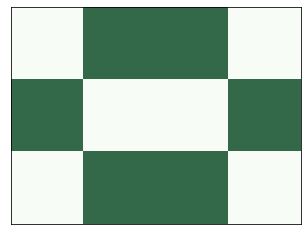

In [7]:
# beehive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()
plt.show('figs/chap06-1')

Here's what it looks like after one step:

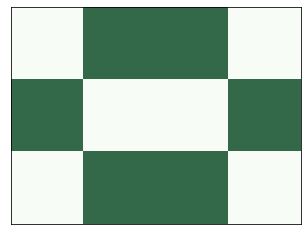

In [8]:
life.step()
life.draw()

A toad is an oscillator with period 2.  Here's are its two configurations:

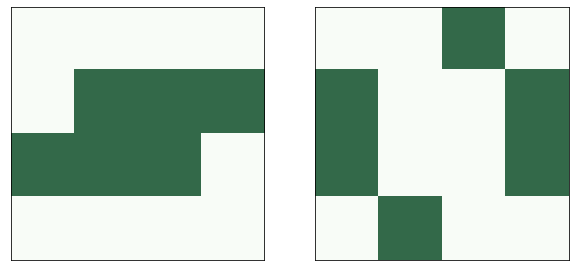

In [9]:
# toad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

plt.show('figs/chap06-2')

Here's what the toad looks like as an animation.

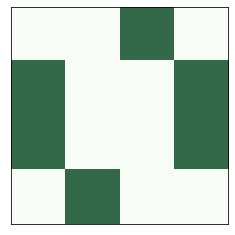

In [10]:
life = make_life(4, 4, 1, 0, '0111', '1110')
#life.step()
life.animate(10, 0.5)

A glider is a spaceship that translates one unit down and to the right with period 4. 

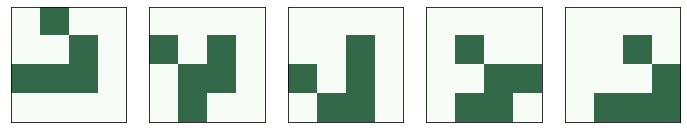

In [11]:
# glider
plt.figure(figsize=(12, 4))

glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()
    
plt.show('figs/chap06-3')

Here's an animation showing glider movement.

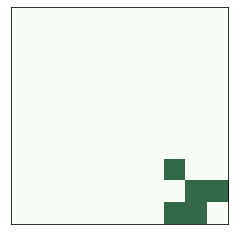

In [12]:
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=28, interval=0.2)

**Exercise:** If you start GoL from a random configuration, it usually runs chaotically for a while and then settles into stable patterns that include blinkers, blocks, and beehives, ships, boats, and loaves.

Start GoL in a random state and run it until it stabilizes (try 1000 steps).
What stable patterns can you identify?

Hint: use `np.random.randint`.

In [13]:
#Excercise 3

def make_random_life(n, m, p):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    random_string = ''
    randoms = [0,1]
    randomlife = Life(n, m)

    for i in range(n):
      out_arr = np.random.choice(randoms, m, p=[1-p, p])
      for j in out_arr:
        random_string = random_string + str(j)
      randomlife.add_cells(i, 0, random_string)
      random_string = ''
     
    return randomlife




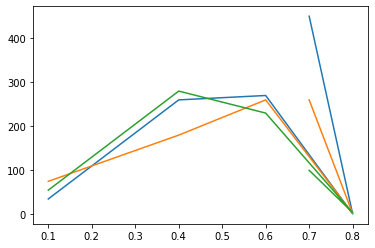

In [14]:
#Excercise 3 Data

p_values = [0.1,0.4, 0.6, 0.8,0.7]
steps_to_stability = [[35,75,55], [260,180,280], [270,260,230], [1,2,4], [450,260,100]]

#life = make_random_life(50,50,0.7)

#life.animate(frames=500,interval=0.2)

plt.plot(p_values, steps_to_stability)
plt.show()

There appears to be a clear pattern when plotting the number of time steps for the random set of tiles to 'stabilize.' Starting out with a small p value, it takes little time to stabilize. As p increases, so does the amount of time steps to approach stabilization. At around 0.35-0.6, the amount of time seems to level off. and once p gets quite high, around 0.8, the amount of time steps drops dramatically, almost to zero.

### Methuselas

Most initial conditions run for a short time and reach a steady state.  But some initial conditional run for a surprisingly long time; they are called Methuselahs.

The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.

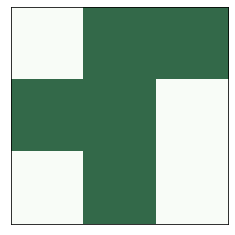

In [15]:
# r pentomino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

Here are the start and finish configurations.

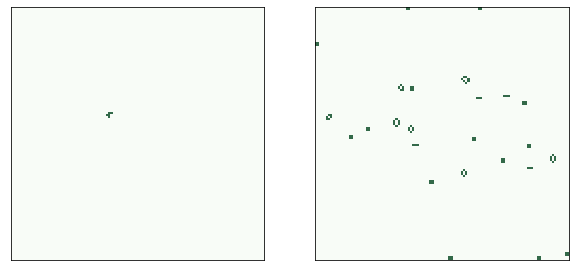

In [16]:
# r pentomino
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()

plt.subplot(1, 2, 2)
life.draw()

plt.show('figs/chap06-4')

And here's the animation that shows the steps.

KeyboardInterrupt: ignored

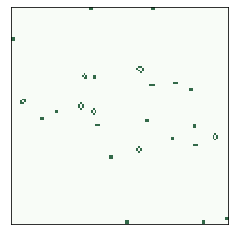

In [17]:
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)

### Conway's conjecture

Most initial conditions run for a short time and reach a steady state.  Some, like the r-pentomino, run for a long time before they reach steady state.  Another example is rabbits, which starts with only nine cells and runs 17331 steps before reaching steady state.

To run my implementation of rabbits, open a terminal in `ThinkComplexity2/code` and run

```
python LifeRabbits.py
```

Patterns that take a long time to reach steady state are called Methuselahs.

Patterns like these prompted Conway's conjecture, which asks whether there are any initial conditions where the number of live cells is unbounded.

Gosper's glider gun was the first entity to be discovered that produces an unbounded number of live cells, which refutes Conway's conjecture.

In [ ]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]

Here's the initial configuration:

In [ ]:
life = make_life(11, 38, 1, 1, *glider_gun)
life.draw()

plt.show('figs/chap06-5')

And here's what it looks like running:

In [ ]:
life = make_life(50, 50, 2, 2, *glider_gun)
life.animate(frames=200)

**Puffer train**

Another way to "refute" Conway's conjecture is a puffer train.

To see a puffer train run, open a terminal and run

```
python LifePuffer.py
```

### Implementing Game of Life

As an example, I'll start with an array of random cells:

In [ ]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)
print(a)

The following is a straightforward translation of the GoL rules using `for` loops and array slicing.

In [ ]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

Here's a smaller, faster version using cross correlation.

In [ ]:
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [ ]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [ ]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

**Exercise:** Many Game of Life patterns are available in portable file formats.

Write a function to parse one of these formats and initialize the array.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
life.draw()

In [ ]:
# Solution goes here

### Highlife

One variation of GoL, called "Highlife", has the
same rules as GoL, plus one additional rule: a dead cell with 6
neighbors comes to life.

You can try out different rules by inheriting from `Life` and changing the lookup table.

**Exercise:** Modify the table below to add the new rule.

In [20]:
# Starter code

class MyLife(Life):
    """Implementation of Life."""

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13,16]] = 1

One of the more interesting patterns in Highlife is the replicator, which has the following initial configuration.


In [21]:
replicator = [
    '00111',
    '01001',
    '10001',
    '10010',
    '11100'
]

Make a `MyLife` object with `n=100` and use `add_cells` to put a replicator near the middle.

Make an animation with about 200 frames and see how it behaves.

In [ ]:
# Solution goes here

**Exercise:** 

If you generalize the Turing machine to two dimensions, or
add a read-write head to a 2-D CA, the result is a
cellular automaton called a Turmite.  It is named after a
termite because of the way the read-write head moves, but
spelled wrong as an homage to Alan Turing.

The most famous Turmite is Langton's Ant, discovered by Chris Langton
in 1986.  

The ant is a read-write head with
four states, which you can think of as facing north, south,
east or west.  The cells have two states, black and white.

The rules are simple.  During each time step, the ant checks the color
of the cell it is on.  If black, the ant turns to the right,
changes the cell to white, and moves forward one space.  If the cell
is white, the ant turns left, changes the cell to black, and moves
forward.

Given a simple world, a simple set of rules, and only one moving part,
you might expect to see simple behavior---but you should know
better by now.  Starting with all white cells, Langton's ant
moves in a seemingly random pattern for more than 10 000 steps
before it enters a cycle with a period of 104 steps.  After
each cycle, the ant is translated diagonally, so it leaves
a trail called the "highway".

Write an implementation of Langton's Ant.

In [ ]:
# Solution goes here

In [ ]:
n = 5
turmite = Turmite(n)
turmite.draw()

In [ ]:
turmite.step()
turmite.draw()

In [ ]:
# Solution goes here

In [ ]:
# And a larger version with 1000 steps

turmite = Turmite(n=30)
anim = turmite.animate(frames=1000)

In [ ]:
# Solution goes here

In [ ]:
# Excercise 1 

#a
options = {'volume': 5, 'brightness': 4, 'zoom': 2}
defaults = {'volume': 1, 'brightness': 3, 'zoom': 1, 'bloom': 7, 'shine': 5}

#c
#Using Unpacking Method
merged = {**options, **defaults}
print(merged)

#Using update method
options.update(defaults)
print(merged)


In [ ]:
#Excercise 2

#(a)
#There are 2^9 different possible states for the 3x3 square grid neighborhood.

#(b)
#There are 2^18 different possible 'rules' for mapping each possible
#neighbourhood state to the output for the centre cell.
#This is barely comparable to the total number of atoms in the observable universe.
#One could do experiments with these rules, however it would take alot of time.

#(c)
#In Conway's game of life, there are two rules:
#how many neighbors must be sorrounding the center cell for it to become alive,
#and, how many neighbors must be sorrounding the center cell for it to stay alive.
#The rules can work like this too. If there are three, or four, or five neighbors, the cell remains alive.
#In other words, there can be more than one cell thats alive
#A rule numbering scheme can be created to sort these rules simply for experimentation.
#Because there are 2^18 different possible rules, we can create a 18 bit and reversed binary number, that looks like this.
#  A0 A1 A2 A3 A4 A5 A6 A7 A8 D0 D1 D2 D3 D4 D5 D6 D7 D8
# [0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0, 0]
#You put a 1 in the left side of the reversed binary corresponding to how many cells are needed for it to become alive.
#You put a 1 on the right side corresponding to how many cells are needed for it to become alive.
#The binary number shown above are the exact rules for Conway's game of life. This binary number is equal to rule 6152.



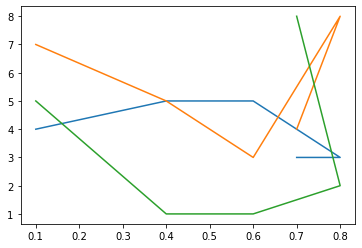

In [68]:
#Excercise 4

class stochLife(Life):
    
    """Implementation of Conway's Game of Life."""
    randMod = 0
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    #table = np.zeros(20, dtype=np.uint8)

    #if randMod == 0:
      #table[[4, 11, 12]] = 1
    #elif randMod == 1:
      #table[[3, 12, 13]] = 1
    #elif randMod == 2:
      #table[[2, 7, 9]] = 1
    #elif randMod == 3:
      #table[[2, 14, 13]] = 1
    #elif randMod == 4:
      #table[[4, 11, 16]] = 1

    
    def step(self):
        """Executes one time step."""
        randMod = np.random.random_integers(5, size=1)[0]
        self.table = np.zeros(20, dtype=np.uint8)

        if randMod == 0:
          self.table[[4, 11, 12]] = 1
        elif randMod == 1:
          self.table[[3, 12, 13]] = 1
        elif randMod == 2:
          self.table[[2, 7, 9]] = 1
        elif randMod == 3:
          self.table[[2, 14, 13]] = 1
        elif randMod == 4:
          self.table[[4, 11, 16]] = 1

        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]


def make_stochRandom_life(n, m, p):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    random_string = ''
    randoms = [0,1]
    randomlife = stochLife(n, m)

    for i in range(n):
      out_arr = np.random.choice(randoms, m, p=[1-p, p])
      for j in out_arr:
        random_string = random_string + str(j)
      randomlife.add_cells(i, 0, random_string)
      random_string = ''
     
    return randomlife        

#z = make_stochRandom_life(50,50,0.9)

#z.animate(frames=30,interval=0.9)

np_values = [0.1,0.4, 0.6, 0.8,0.7]
nsteps_to_stability = [[4,7,5], [5,5,1], [5,3,1], [3,8,2], [3,4,8]]

plt.plot(np_values, nsteps_to_stability)
plt.show()

From This graph, we can see that using different rules every time-step for our last experiment, yields completely random results. The only consistent pattern is that every iteration takes around 1-7 timesteps for all the tiles to completely dissappear. It only seems to hinder our understanding of the model's output. More in depth experimentation is required for a model that changes its rules every time-step.